This code describs a step by step method to develope a model that detects pens and books in images using object detection techniques. By training the YOLOv8 model on a pre-annotated dataset, it learned to recognize and locate these items, with its accuracy evaluated using a confusion matrix. The model can help organize educational materials, manage inventory, and enhance educational tools by automatically identifying and sorting pens and books, demonstrating the efficiency of object detection in managing supplies.








#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Fri Jun 21 19:32:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#**We will clone the OID v4 Toolkit, to download the images from the Open Image Dataset**

In [7]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [8]:
!pwd

/content


In [9]:
%cd /content/OIDv4_ToolKit

/content/OIDv4_ToolKit


In [10]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


#**Downloading the Pen and Book images**

In [11]:
!python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [12]:
!python main.py downloader --classes Pen Book --type_csv all --multiclasses 1 --limit 120


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Pen', 'Book'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 48522 KB/s, 0 seconds passed
[

In [13]:
!zip -r /content/Dataset.zip /content/OIDv4_ToolKit/OID/Dataset

  adding: content/OIDv4_ToolKit/OID/Dataset/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/ (stored 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/22e77e58651810bf.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/1e0a44b7b3cb1d5f.jpg (deflated 2%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/db124081108638ea.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/407f17aef1998eae.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/a09ff3a4b88d6f97.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/6347108949f5cbe2.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/80140fbe2856945b.jpg (deflated 0%)
  adding: content/OIDv4_ToolKit/OID/Dataset/validation/Pen_Book/19822f5f6db7de1f.jpg (deflated 0%)
  addi

#**Installing Ultralytics using Pip Install**

In [10]:
HOME = '/content/'

In [11]:
print(HOME)

/content/


In [12]:
%cd /content/

/content


In [13]:
!pip install ultralytics==8.0.0

##Checking whether YOLOv8 is Installed and its working Fine

In [14]:
import ultralytics

In [15]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/201.2 GB disk)


#**Importing the Pen and Book Images Dataset from Roboflow**

In [16]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content//datasets’: File exists


In [17]:
!pwd

/content


In [18]:
%cd {HOME}/datasets


/content/datasets


In [19]:
!pwd

/content/datasets


In [22]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HsHMThKHMJ8hwrOcpAc9")
project = rf.workspace("jude-h0f2m").project("pen_and_book")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pen_and_Book-1 in yolov5pytorch:: 100%|██████████| 1170/1170 [00:00<00:00, 4858.47it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [23]:
%cd {HOME}

/content


In [24]:
%cd {dataset.location}

/content/Pen_and_Book-1


In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/Pen_and_Book-1/data.yaml epochs=70 imgsz=640

/content
100% 6.23M/6.23M [00:00<00:00, 111MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Pen_and_Book-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, wei

In [26]:
!ls {HOME}//runs/detect/train

args.yaml					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1718998519.cf84d27b5ba8.3962.0  train_batch0.jpg	 val_batch1_labels.jpg
F1_curve.png					    train_batch1560.jpg  val_batch1_pred.jpg
P_curve.png					    train_batch1561.jpg  val_batch2_labels.jpg
PR_curve.png					    train_batch1562.jpg  val_batch2_pred.jpg
predictions.json				    train_batch1.jpg	 weights
R_curve.png					    train_batch2.jpg


#**Displaying the Confusion Matrix**

/content


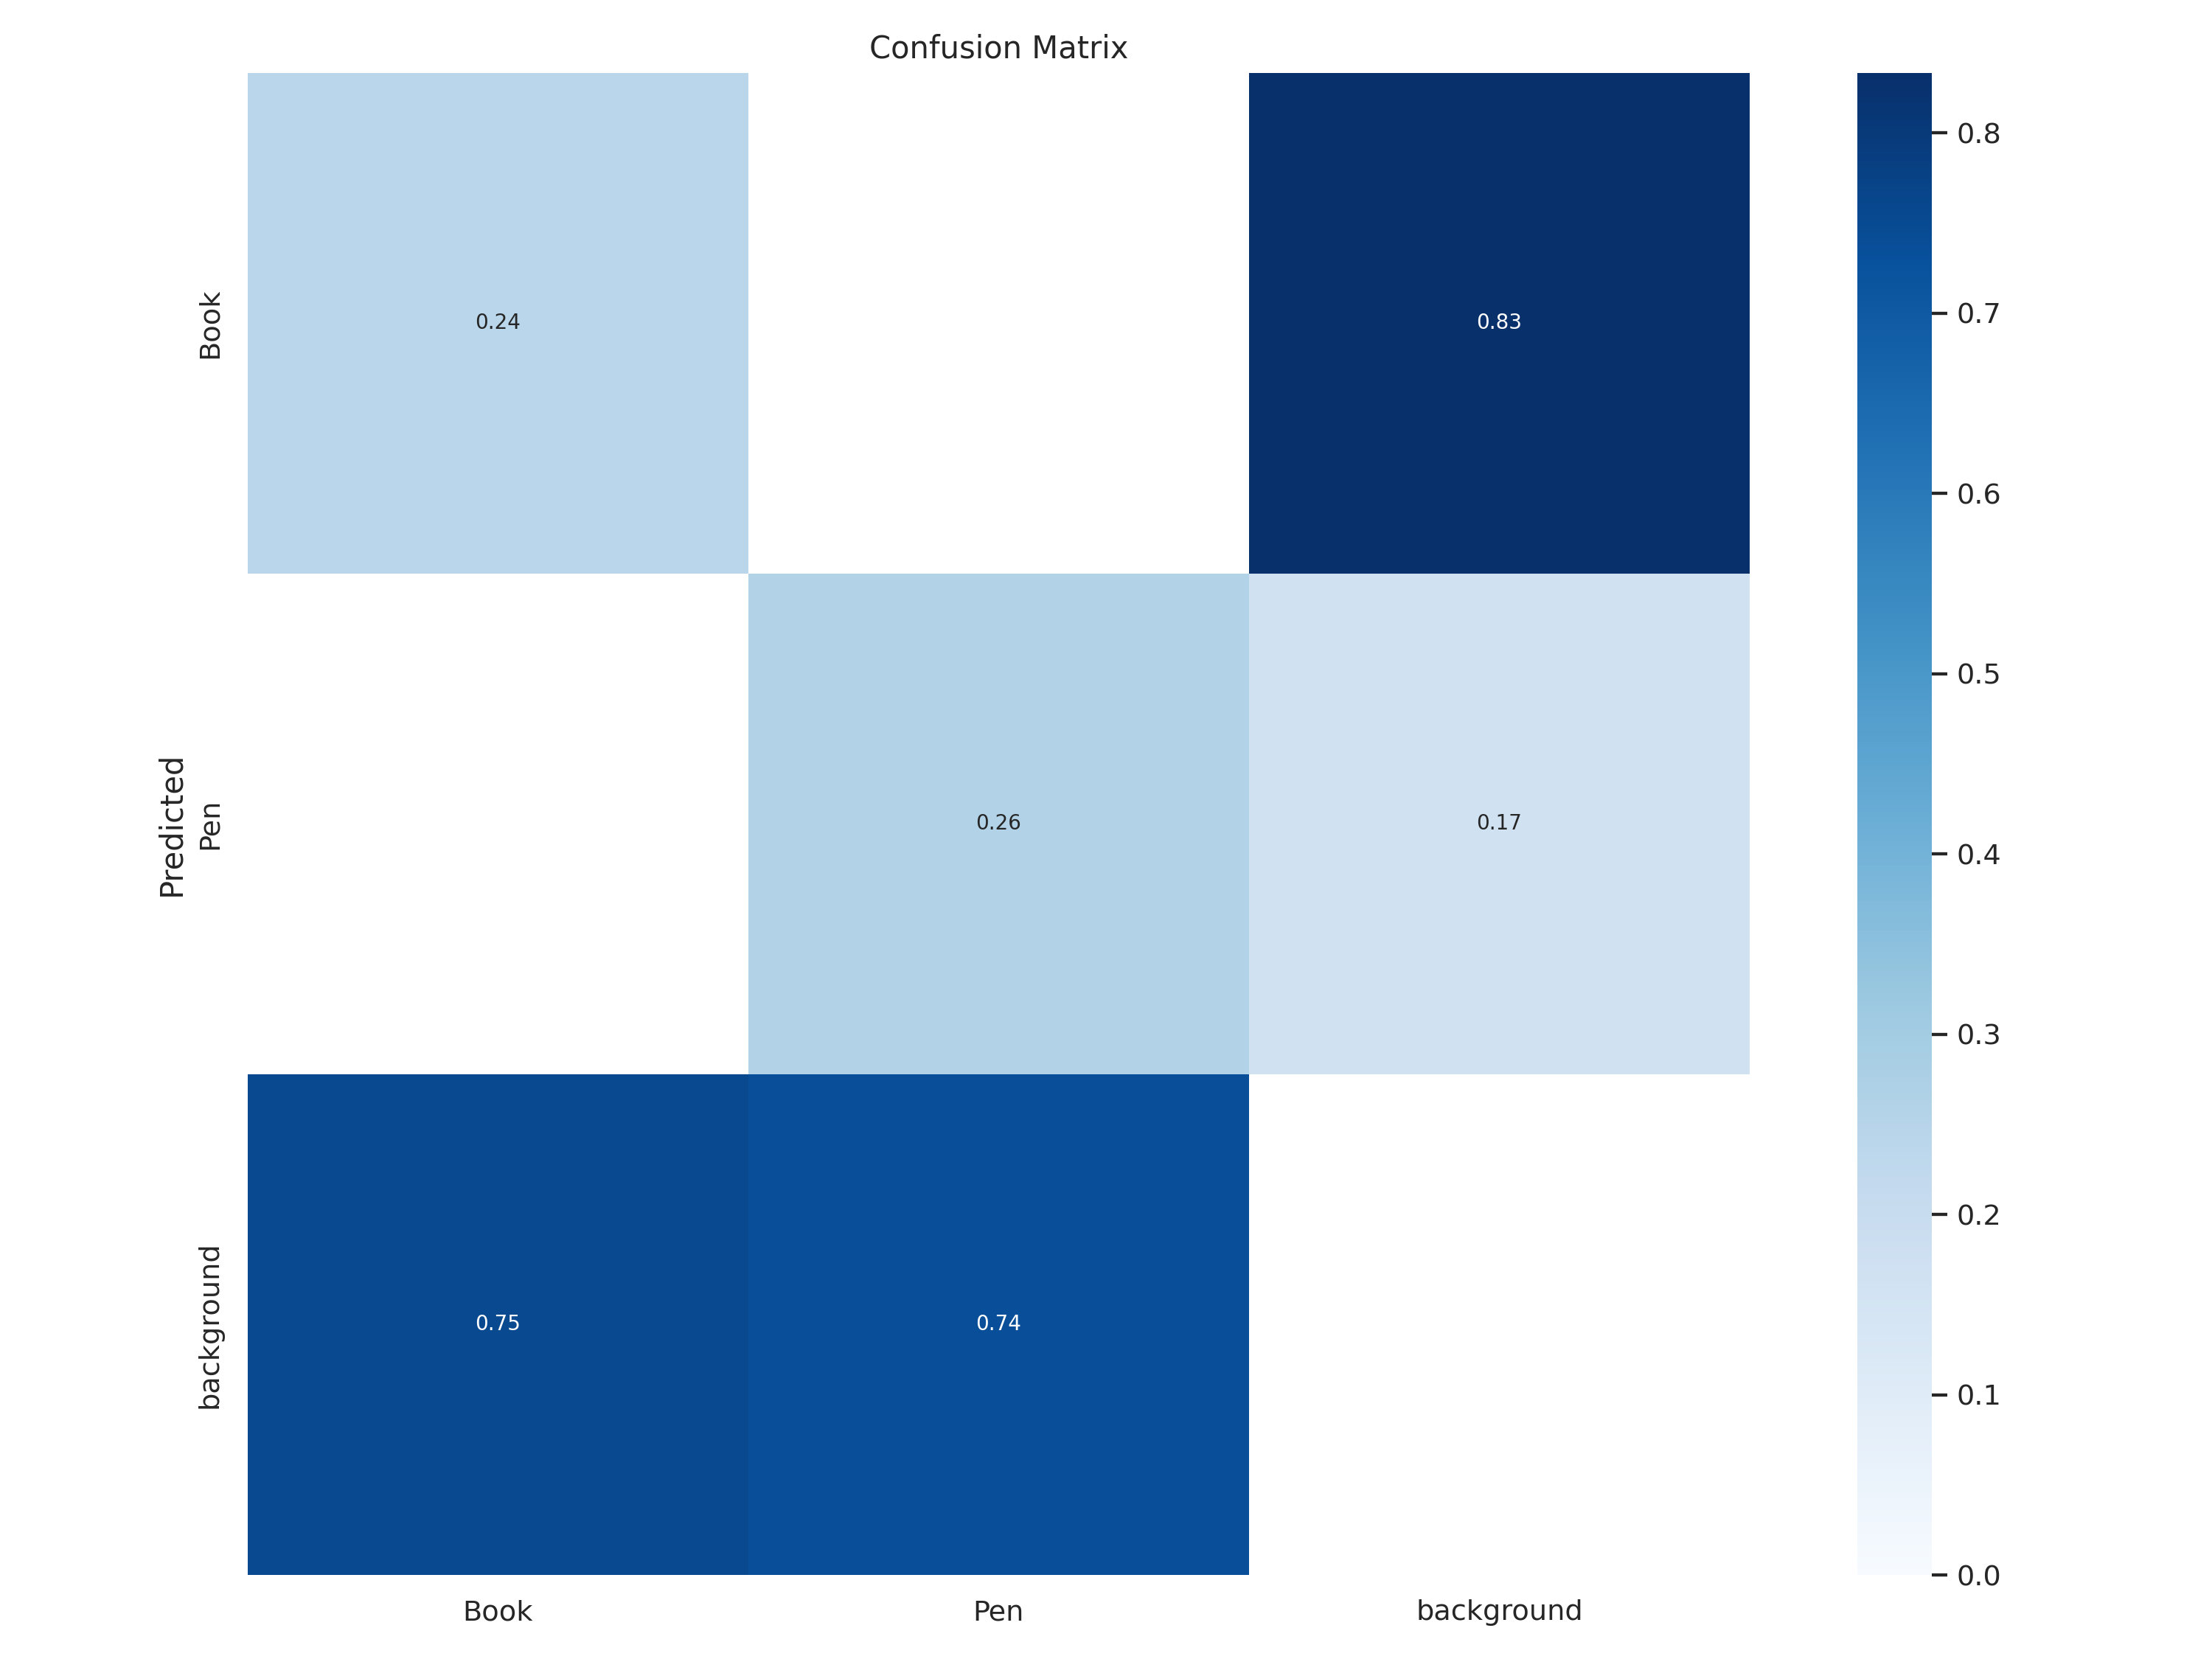

In [27]:
#Confusion matrix is the chart that shows how our model handles different classes
#33% of the times the model detected correctly that this is a Book, while 67% of the time, when the Book is there but the model is not
#able to detect it
#11% of the time the model is able to detect correctly that there is a pen while 1% the time we get bounding box but pen is incorrectly
#classified as book while 88% of the time when pen is there but model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


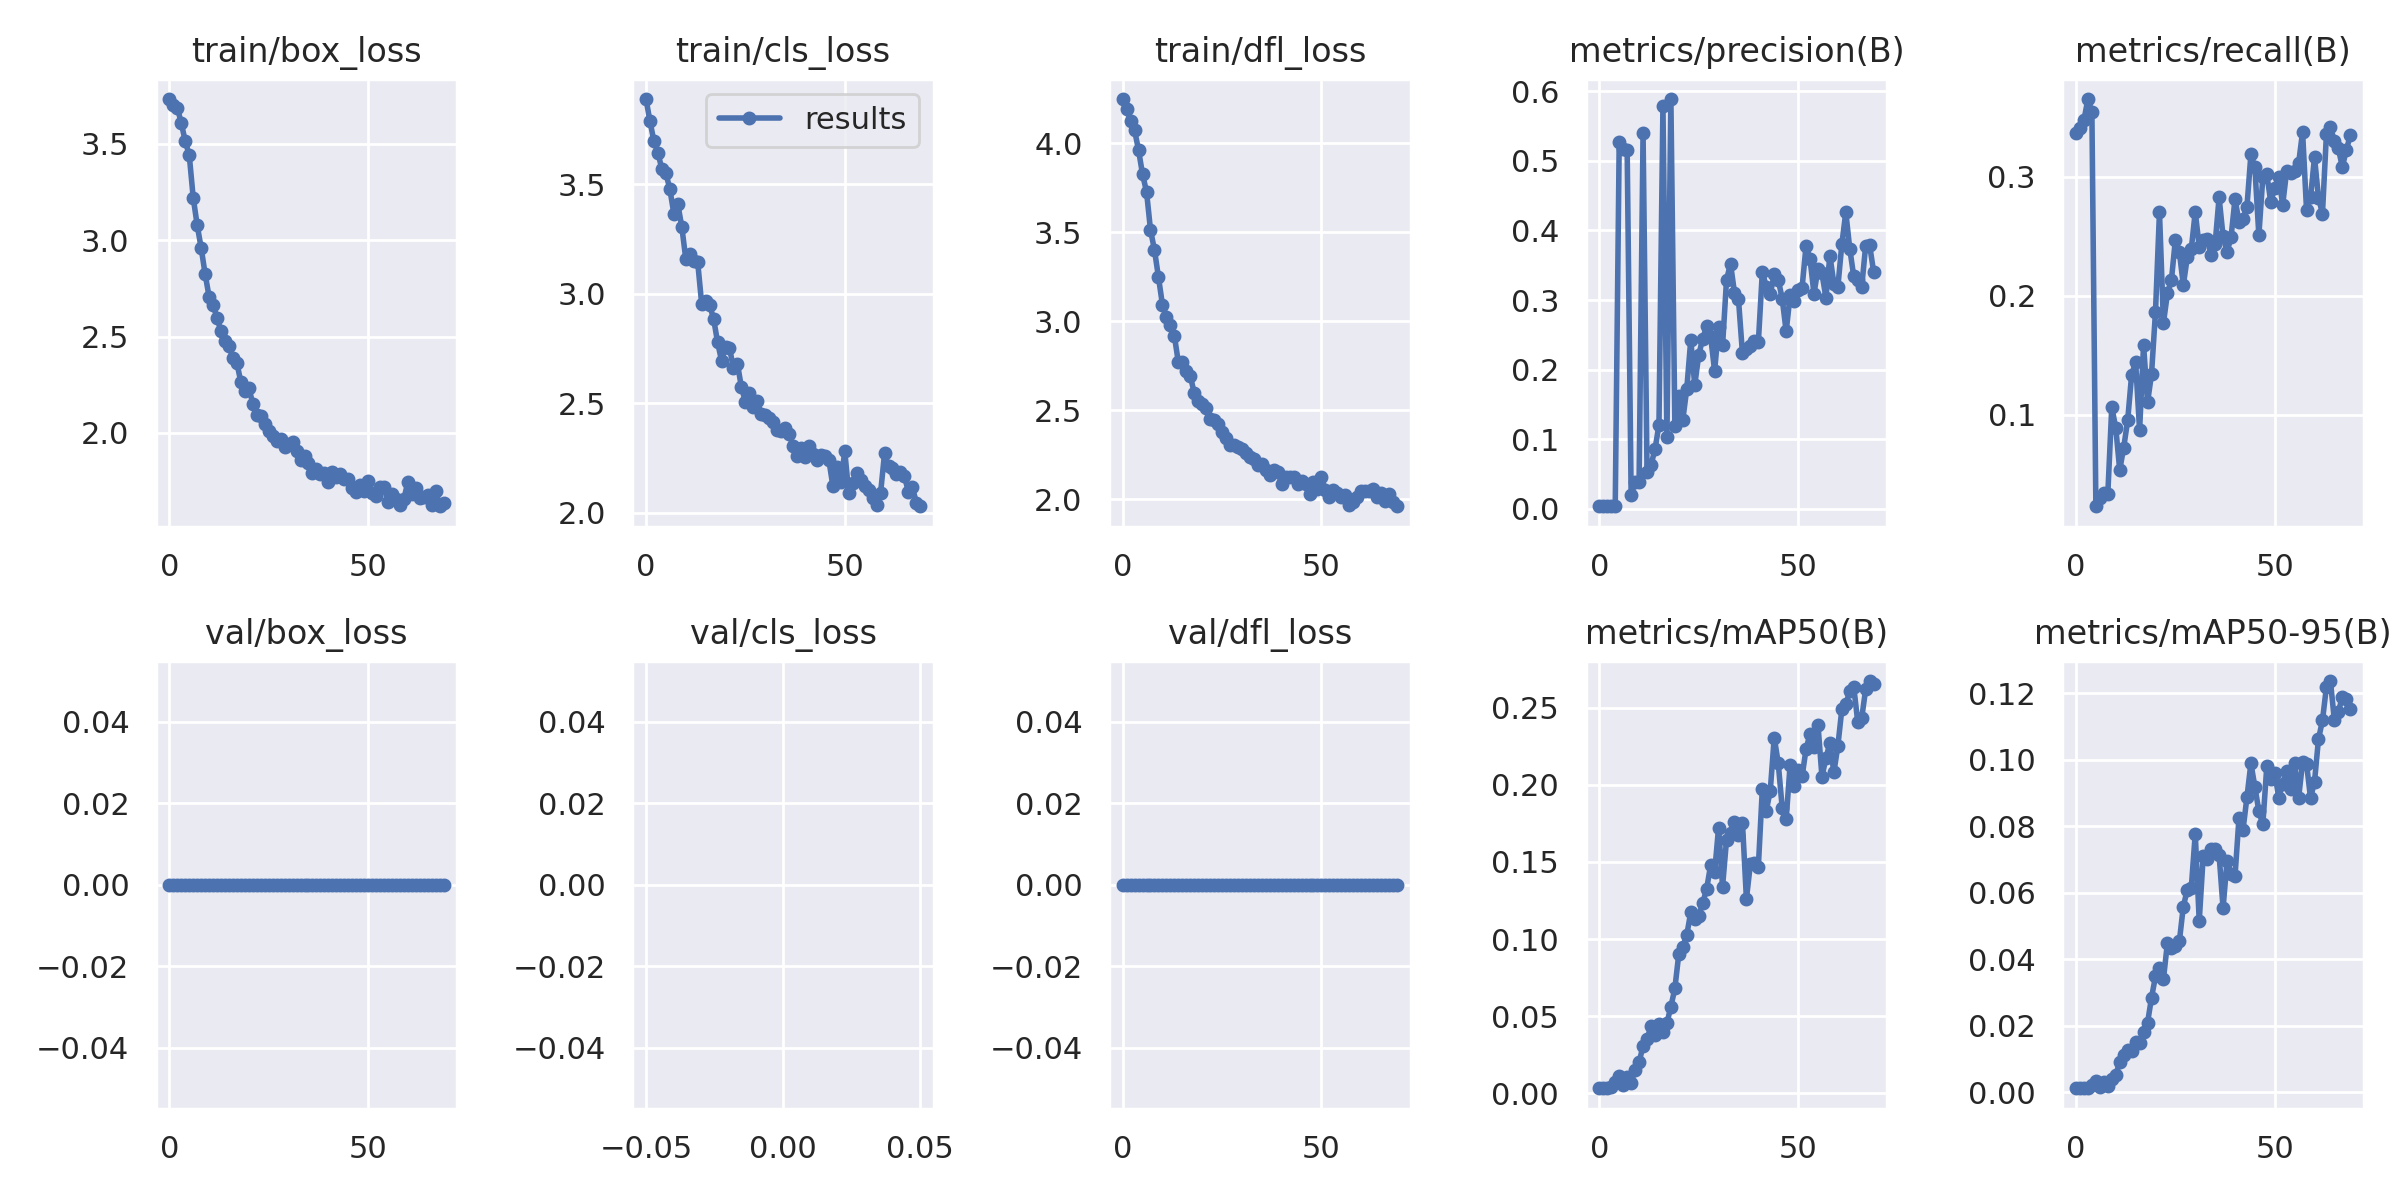

In [28]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

/content


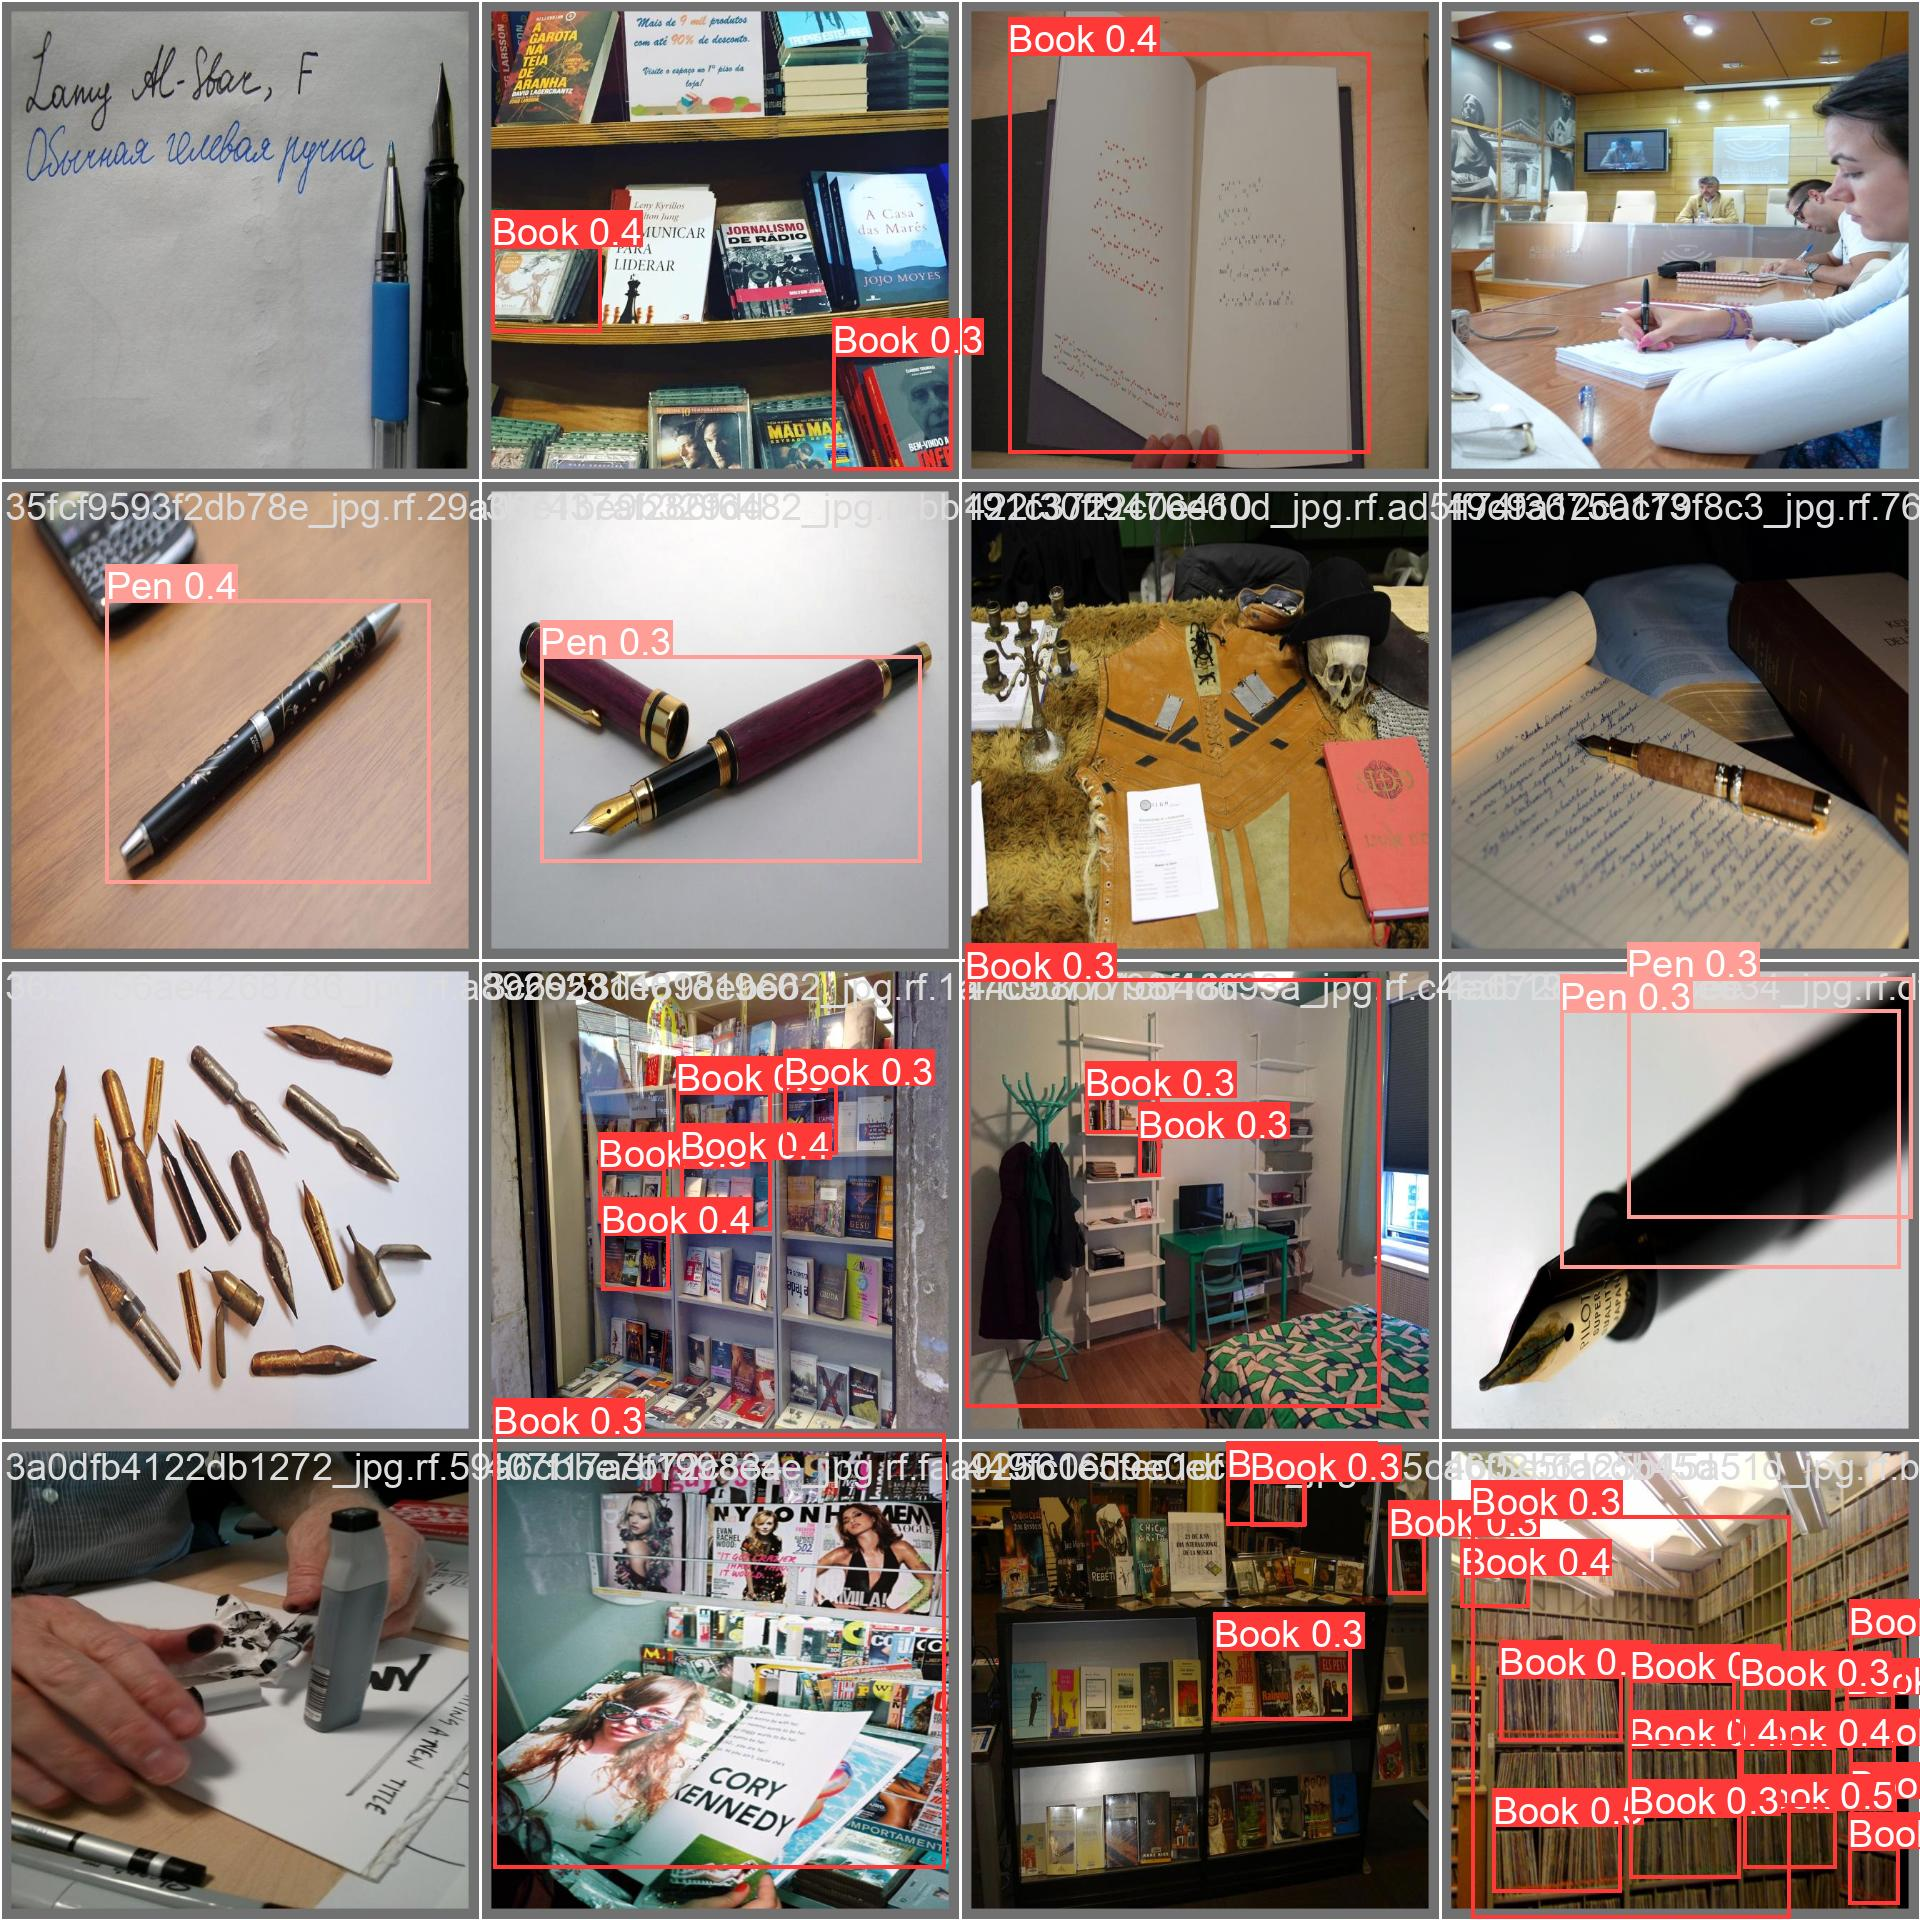

In [29]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

#**Validate Custom Model**

In [30]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/Pen_and_Book-1/data.yaml

/content
2024-06-21 20:01:05.540463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 20:01:05.540514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 20:01:05.541992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 20:01:05.548982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 20:01:06.817609: W tensor

#**Inference with Custom Model**

In [31]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Pen_and_Book-1/test/images

/content
2024-06-21 20:02:56.849641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 20:02:56.849694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 20:02:56.851050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 20:02:56.857994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 20:02:58.019581: W tensor

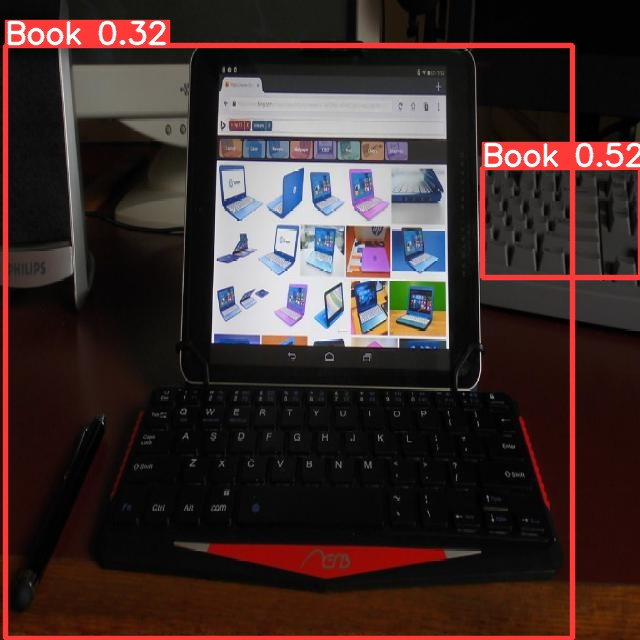

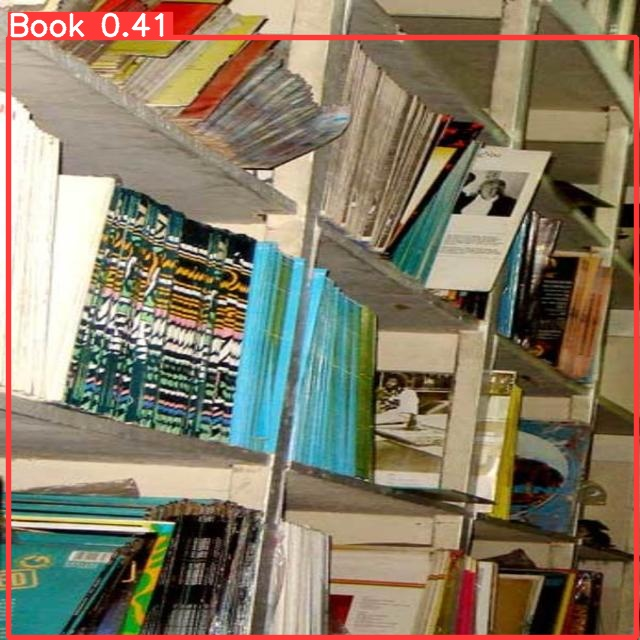

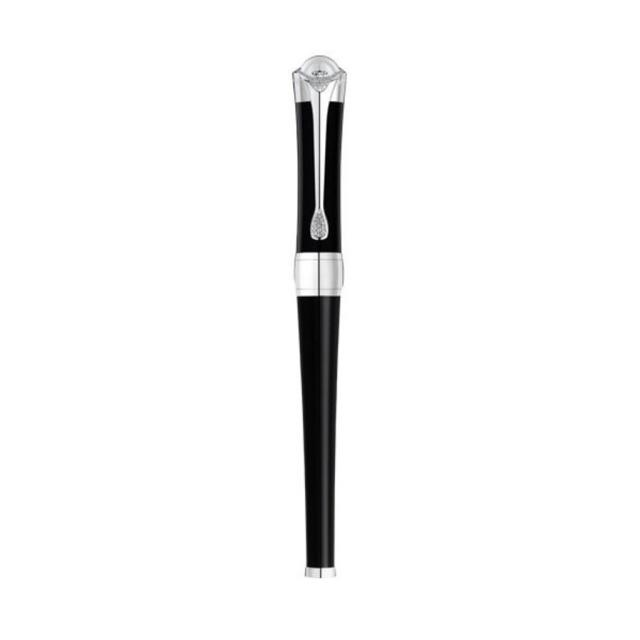

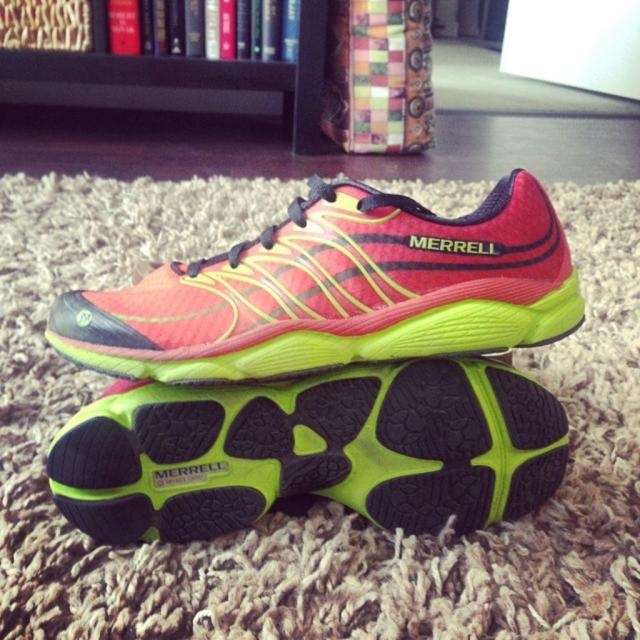

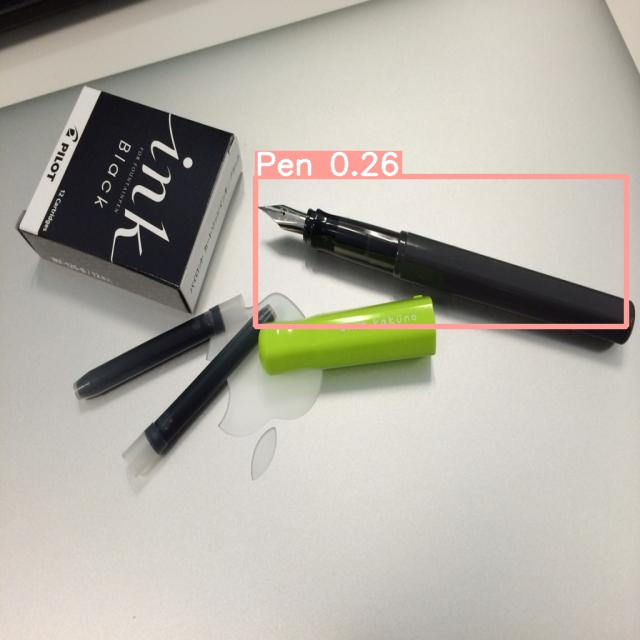

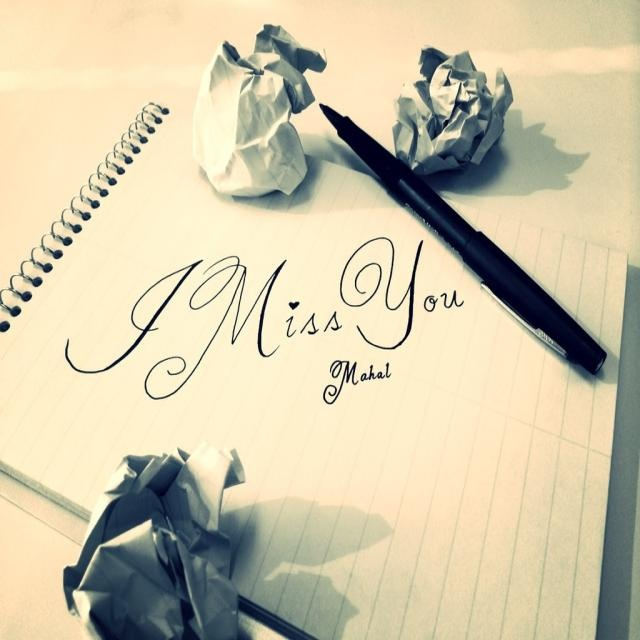

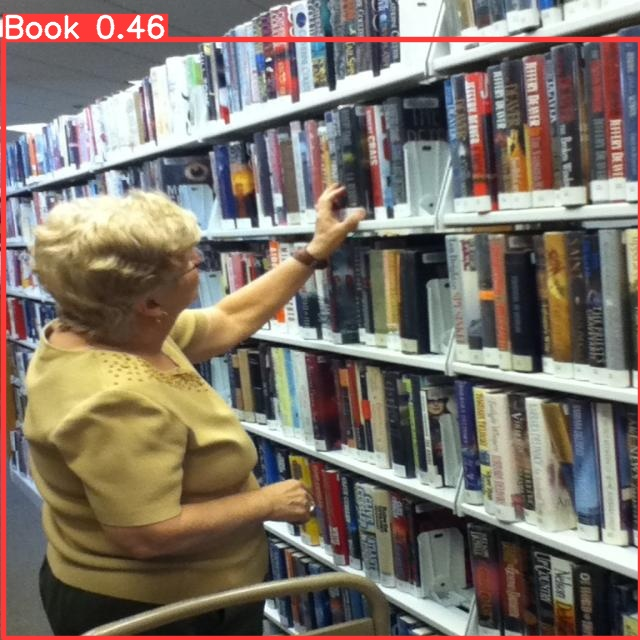

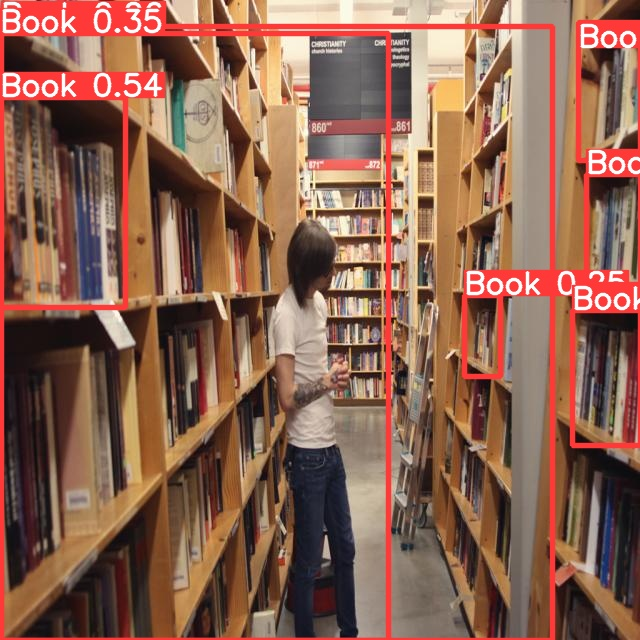

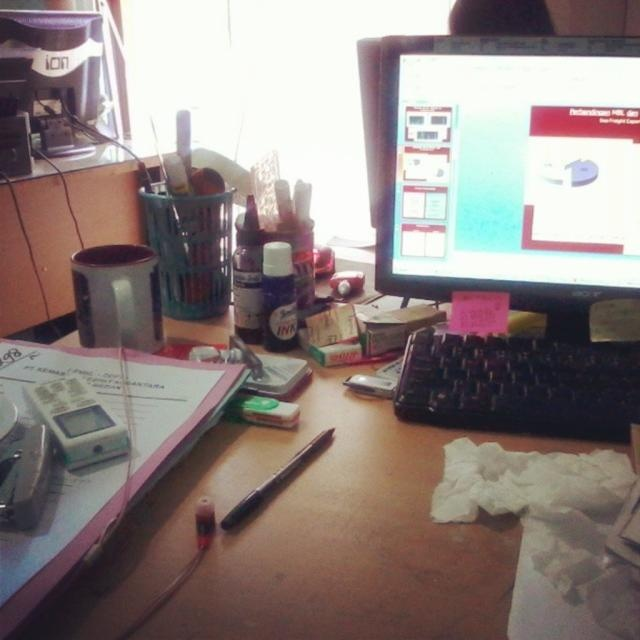

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[1:10]:
      display(Image(filename=image_path, width=600))
      print("\n")